# Loading the Raw Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from tqdm import tqdm  # For progress bar

In [2]:
csv_file = "/Users/shilpashribharath/Documents/MSDSP/498_Capstone/en.openfoodfacts.org.products.csv"

# Start timer
start_time = time.time()

chunk_size = 5000  # Number of rows per chunk
chunks = []  # Store processed chunks

# Estimate the total number of rows in the file (optional for progress bar)
total_lines = sum(1 for _ in open(csv_file, "r", encoding="utf-8"))
num_chunks = total_lines // chunk_size

# Read CSV in chunks with tqdm progress bar
for chunk in tqdm(pd.read_csv(csv_file, sep="\t", on_bad_lines="skip", encoding="utf-8", 
                              low_memory=False, chunksize=chunk_size), total=num_chunks, desc="Processing"):
    chunks.append(chunk)  # Store chunks

# Combine all chunks into a single DataFrame (optional)
df = pd.concat(chunks, ignore_index=True)

# End timer
end_time = time.time()

print(f"Total rows processed: {len(df)}")
print(f"Time taken: {end_time - start_time:.2f} seconds")
print(df.head())


Processing: 731it [01:10, 10.30it/s]                         


Total rows processed: 3651753
Time taken: 130.56 seconds
  code                                                url  creator  \
0   54  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
1   63  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
2  114  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
3    1  http://world-en.openfoodfacts.org/product/0000...      inf   
4  105  http://world-en.openfoodfacts.org/product/0000...  kiliweb   

    created_t      created_datetime  last_modified_t last_modified_datetime  \
0  1582569031  2020-02-24T18:30:31Z       1733085204   2024-12-01T20:33:24Z   
1  1673620307  2023-01-13T14:31:47Z       1732913331   2024-11-29T20:48:51Z   
2  1580066482  2020-01-26T19:21:22Z       1737247862   2025-01-19T00:51:02Z   
3  1634745456  2021-10-20T15:57:36Z       1738676541   2025-02-04T13:42:21Z   
4  1572117743  2019-10-26T19:22:23Z       1738073570   2025-01-28T14:12:50Z   

   last_modified_by  last_updated_t last_update

In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,54,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1582569031,2020-02-24T18:30:31Z,1733085204,2024-12-01T20:33:24Z,NaN,1.738849e+09,2025-02-06T13:42:06Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1732913331,2024-11-29T20:48:51Z,insectproductadd,1.738849e+09,2025-02-06T13:41:15Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1580066482,2020-01-26T19:21:22Z,1737247862,2025-01-19T00:51:02Z,smoothie-app,1.738688e+09,2025-02-04T16:50:01Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1738676541,2025-02-04T13:42:21Z,waistline-app,1.738848e+09,2025-02-06T13:22:19Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572117743,2019-10-26T19:22:23Z,1738073570,2025-01-28T14:12:50Z,NaN,1.738851e+09,2025-02-06T14:04:43Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check for missing values
print(df.isnull().sum())

code                      0
url                       0
creator                  13
created_t                 0
created_datetime          0
                     ...   
inositol_100g       3651629
carnitine_100g      3651671
sulphate_100g       3651587
nitrate_100g        3651606
acidity_100g        3651727
Length: 206, dtype: int64


# EDA

In [5]:
import pandas as pd

df['nutriscore_score'] = pd.to_numeric(df['nutriscore_score'], errors='coerce')

# Define the list of features
features = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 
            'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
            'sodium_100g', 'potassium_100g', 'calcium_100g', 'iron_100g', 
            'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sugars_100g', 'nutriscore_score']

# Compute the correlation matrix
correlation_matrix = df[features].corr()

# Display the correlation matrix
print(correlation_matrix)

                                                     energy_100g  \
energy_100g                                         1.000000e+00   
fat_100g                                           -2.079713e-07   
saturated-fat_100g                                 -3.964316e-07   
trans-fat_100g                                     -1.386114e-05   
cholesterol_100g                                   -5.393926e-05   
carbohydrates_100g                                 -7.616527e-07   
fiber_100g                                         -7.886888e-07   
proteins_100g                                      -3.717750e-07   
salt_100g                                          -4.327586e-07   
sodium_100g                                        -4.327590e-07   
potassium_100g                                     -9.598143e-05   
calcium_100g                                       -5.562047e-05   
iron_100g                                          -4.383679e-05   
fruits-vegetables-nuts-estimate-from-ingredient.

In [6]:
print(df[features].dtypes)

energy_100g                                              float64
fat_100g                                                 float64
saturated-fat_100g                                       float64
trans-fat_100g                                           float64
cholesterol_100g                                         float64
carbohydrates_100g                                       float64
fiber_100g                                               float64
proteins_100g                                            float64
salt_100g                                                float64
sodium_100g                                              float64
potassium_100g                                           float64
calcium_100g                                             float64
iron_100g                                                float64
fruits-vegetables-nuts-estimate-from-ingredients_100g    float64
sugars_100g                                              float64
nutriscore_score         

# Correlation matrix before data pre-processing

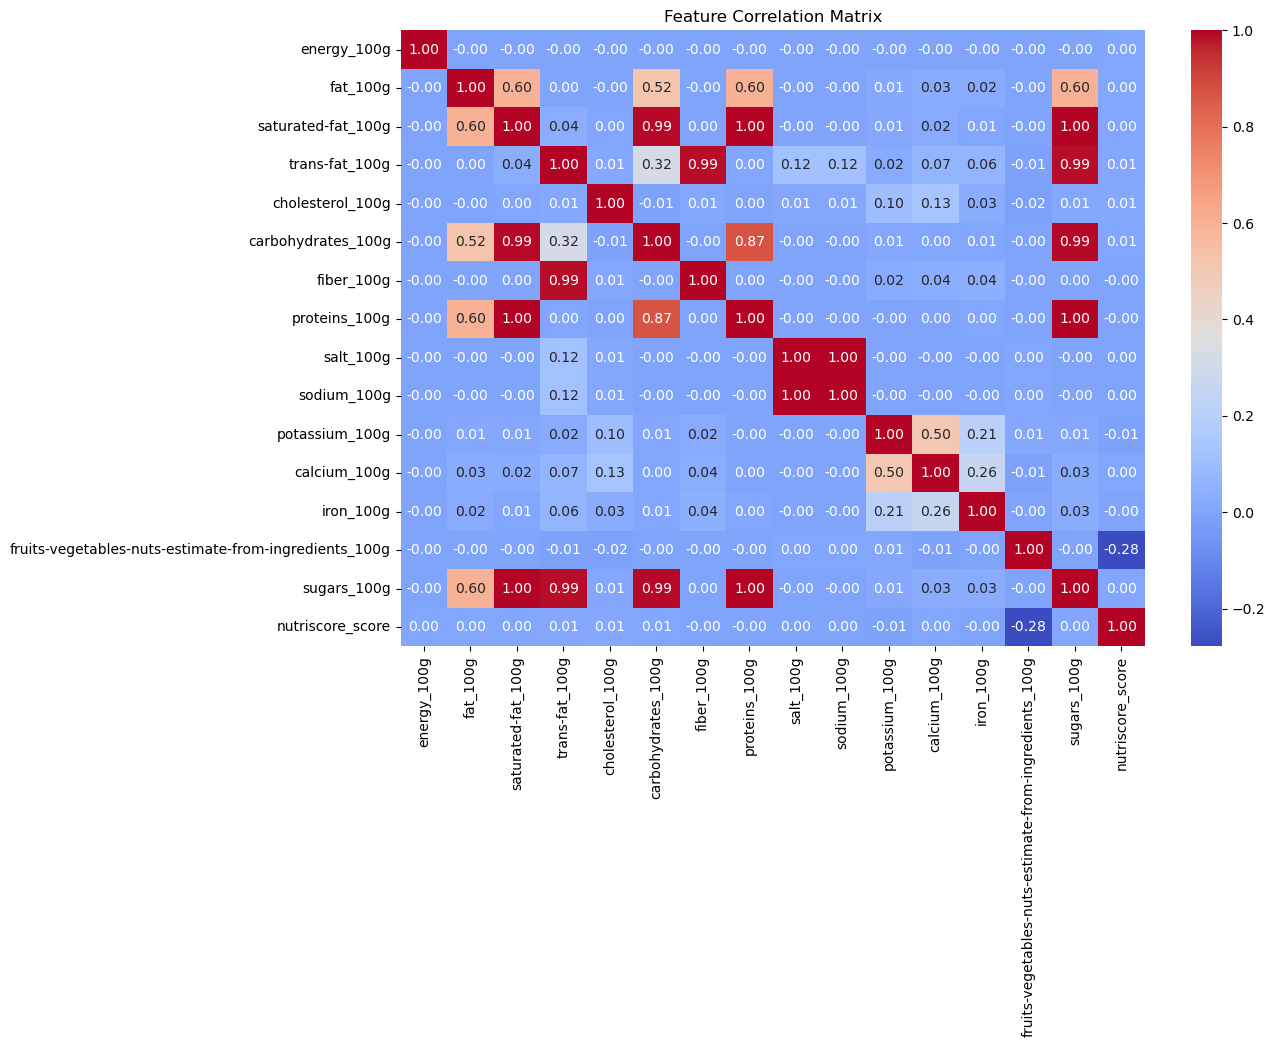

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Probability distribution of nutriscore before data pre-processing

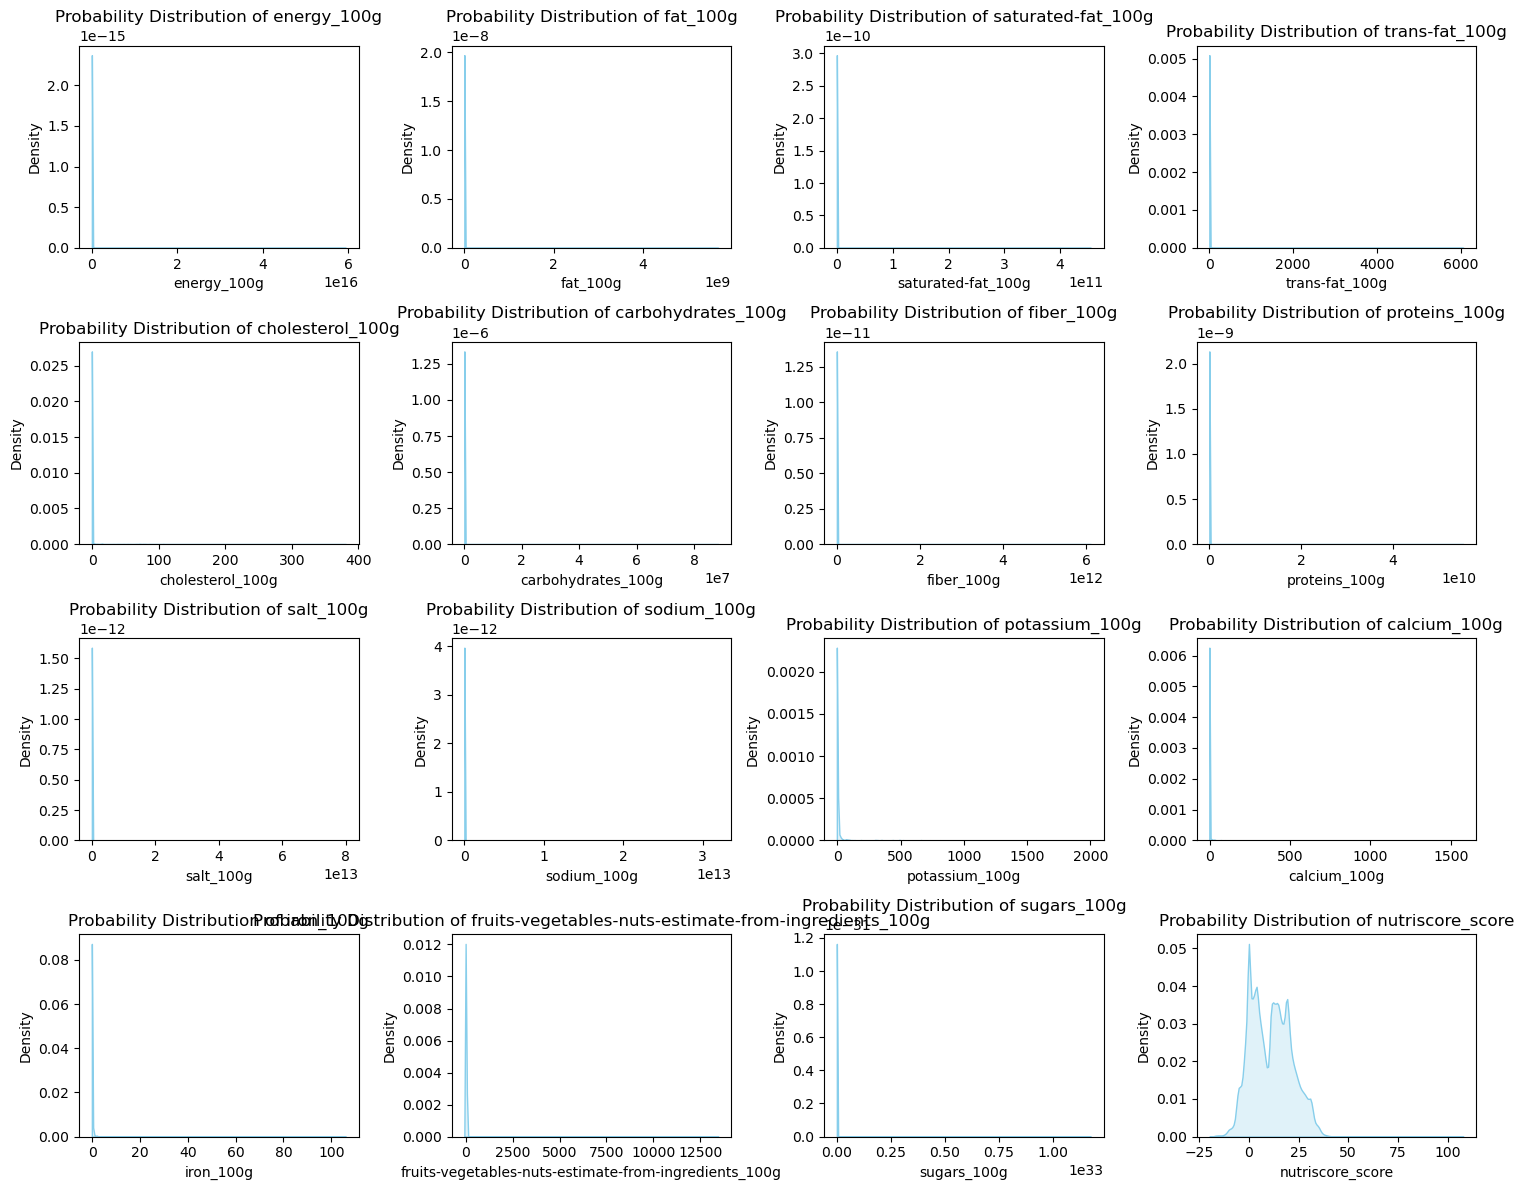

In [8]:
# Set up the plot grid
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(df[feature], fill=True, color="skyblue")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"Probability Distribution of {feature}")

plt.tight_layout()
plt.show()

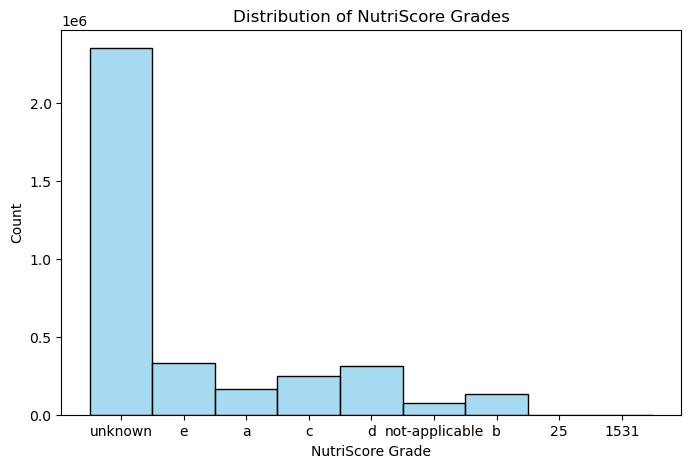

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['nutriscore_grade'], bins=5, discrete=True, kde=False, color='skyblue')

plt.xlabel('NutriScore Grade')
plt.ylabel('Count')
plt.title('Distribution of NutriScore Grades')
plt.show()

# Impact of various nutrients on nutriscore

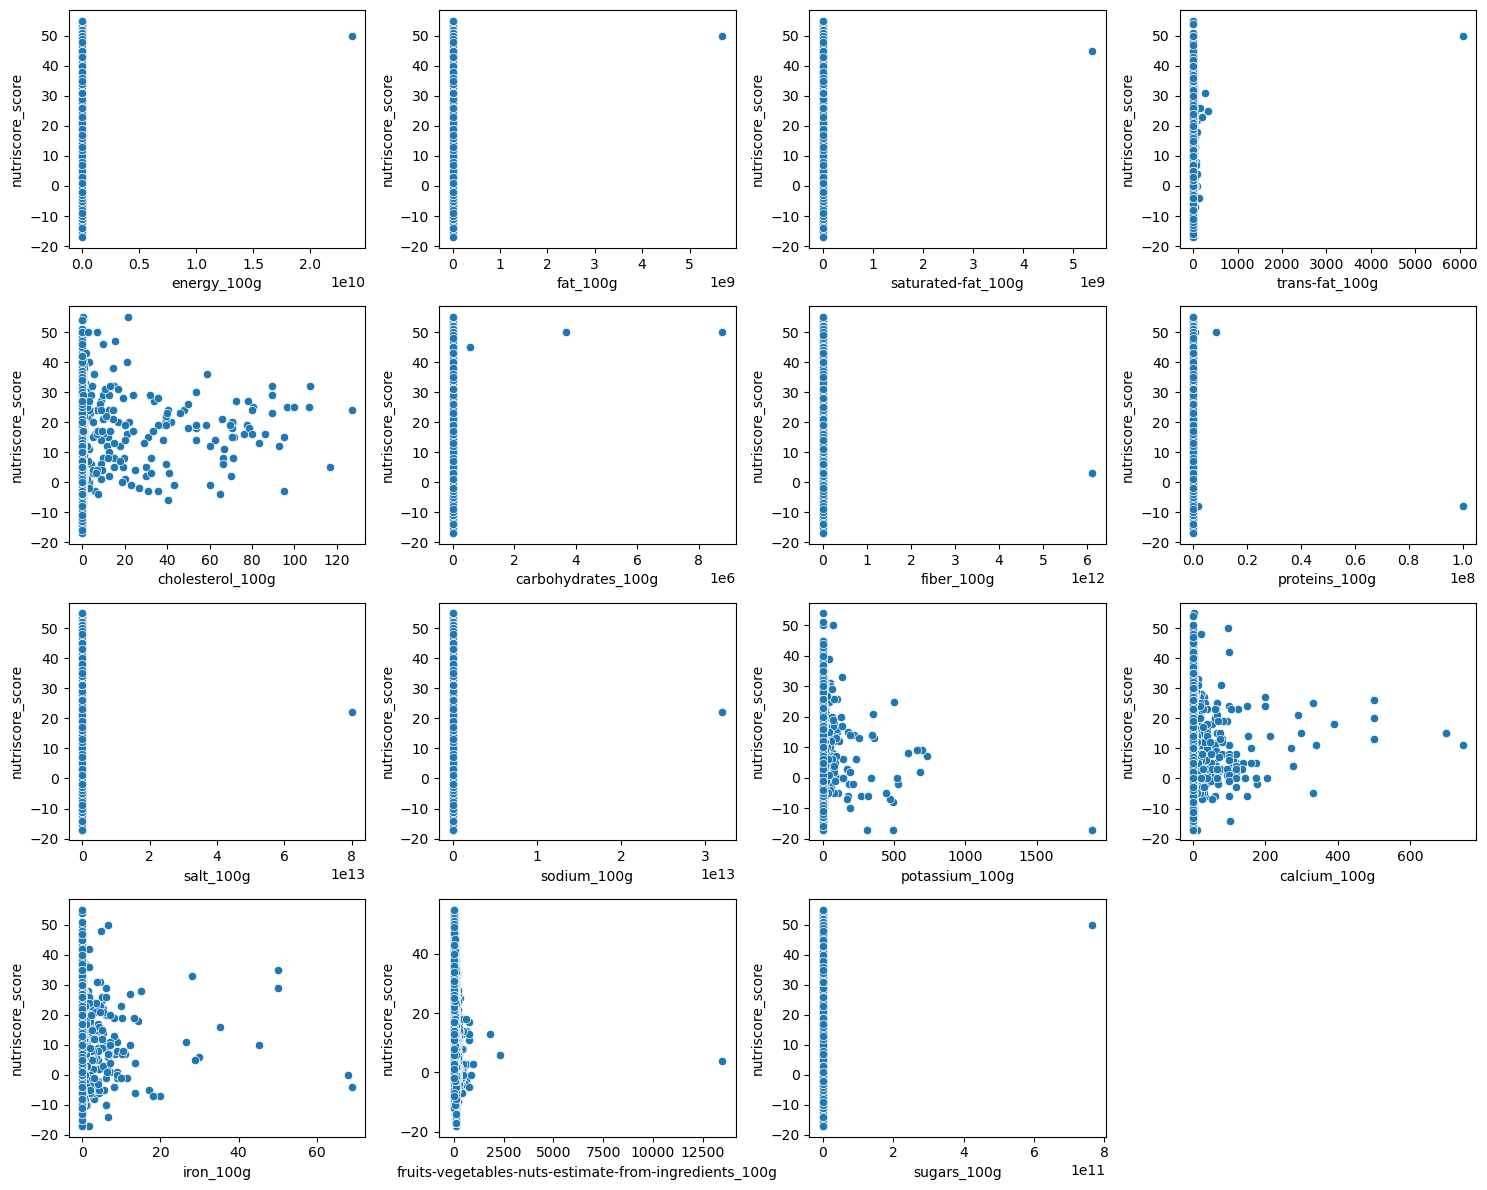

In [10]:
# Define the list of features
features = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 
            'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
            'sodium_100g', 'potassium_100g', 'calcium_100g', 'iron_100g', 
            'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sugars_100g']

# Set up the figure size
plt.figure(figsize=(15, 12))

# Generate scatter plots
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)  # Arrange subplots in a grid
    sns.scatterplot(x=df[feature], y=df['nutriscore_score'])
    plt.xlabel(feature)
    plt.ylabel('nutriscore_score')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Data Pre-processing

In [11]:
# Define the features for outlier removal
features_clean = ['nutriscore_score', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 
                  'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
                  'sodium_100g', 'potassium_100g', 'calcium_100g', 'iron_100g', 
                  'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sugars_100g']

# Compute IQR for each feature
Q1 = df[features_clean].quantile(0.25)
Q3 = df[features_clean].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df[features_clean] < lower_bound) | (df[features_clean] > upper_bound)).any(axis=1)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]}")

Original dataset size: 3651753
Dataset size after outlier removal: 2708860


/var/folders/tp/rc_syfh92c5_0fq590qjggtw0000gn/T/ipykernel_1368/184488458.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_cleaned[feature], fill=True, ax=axes[i], color="skyblue")


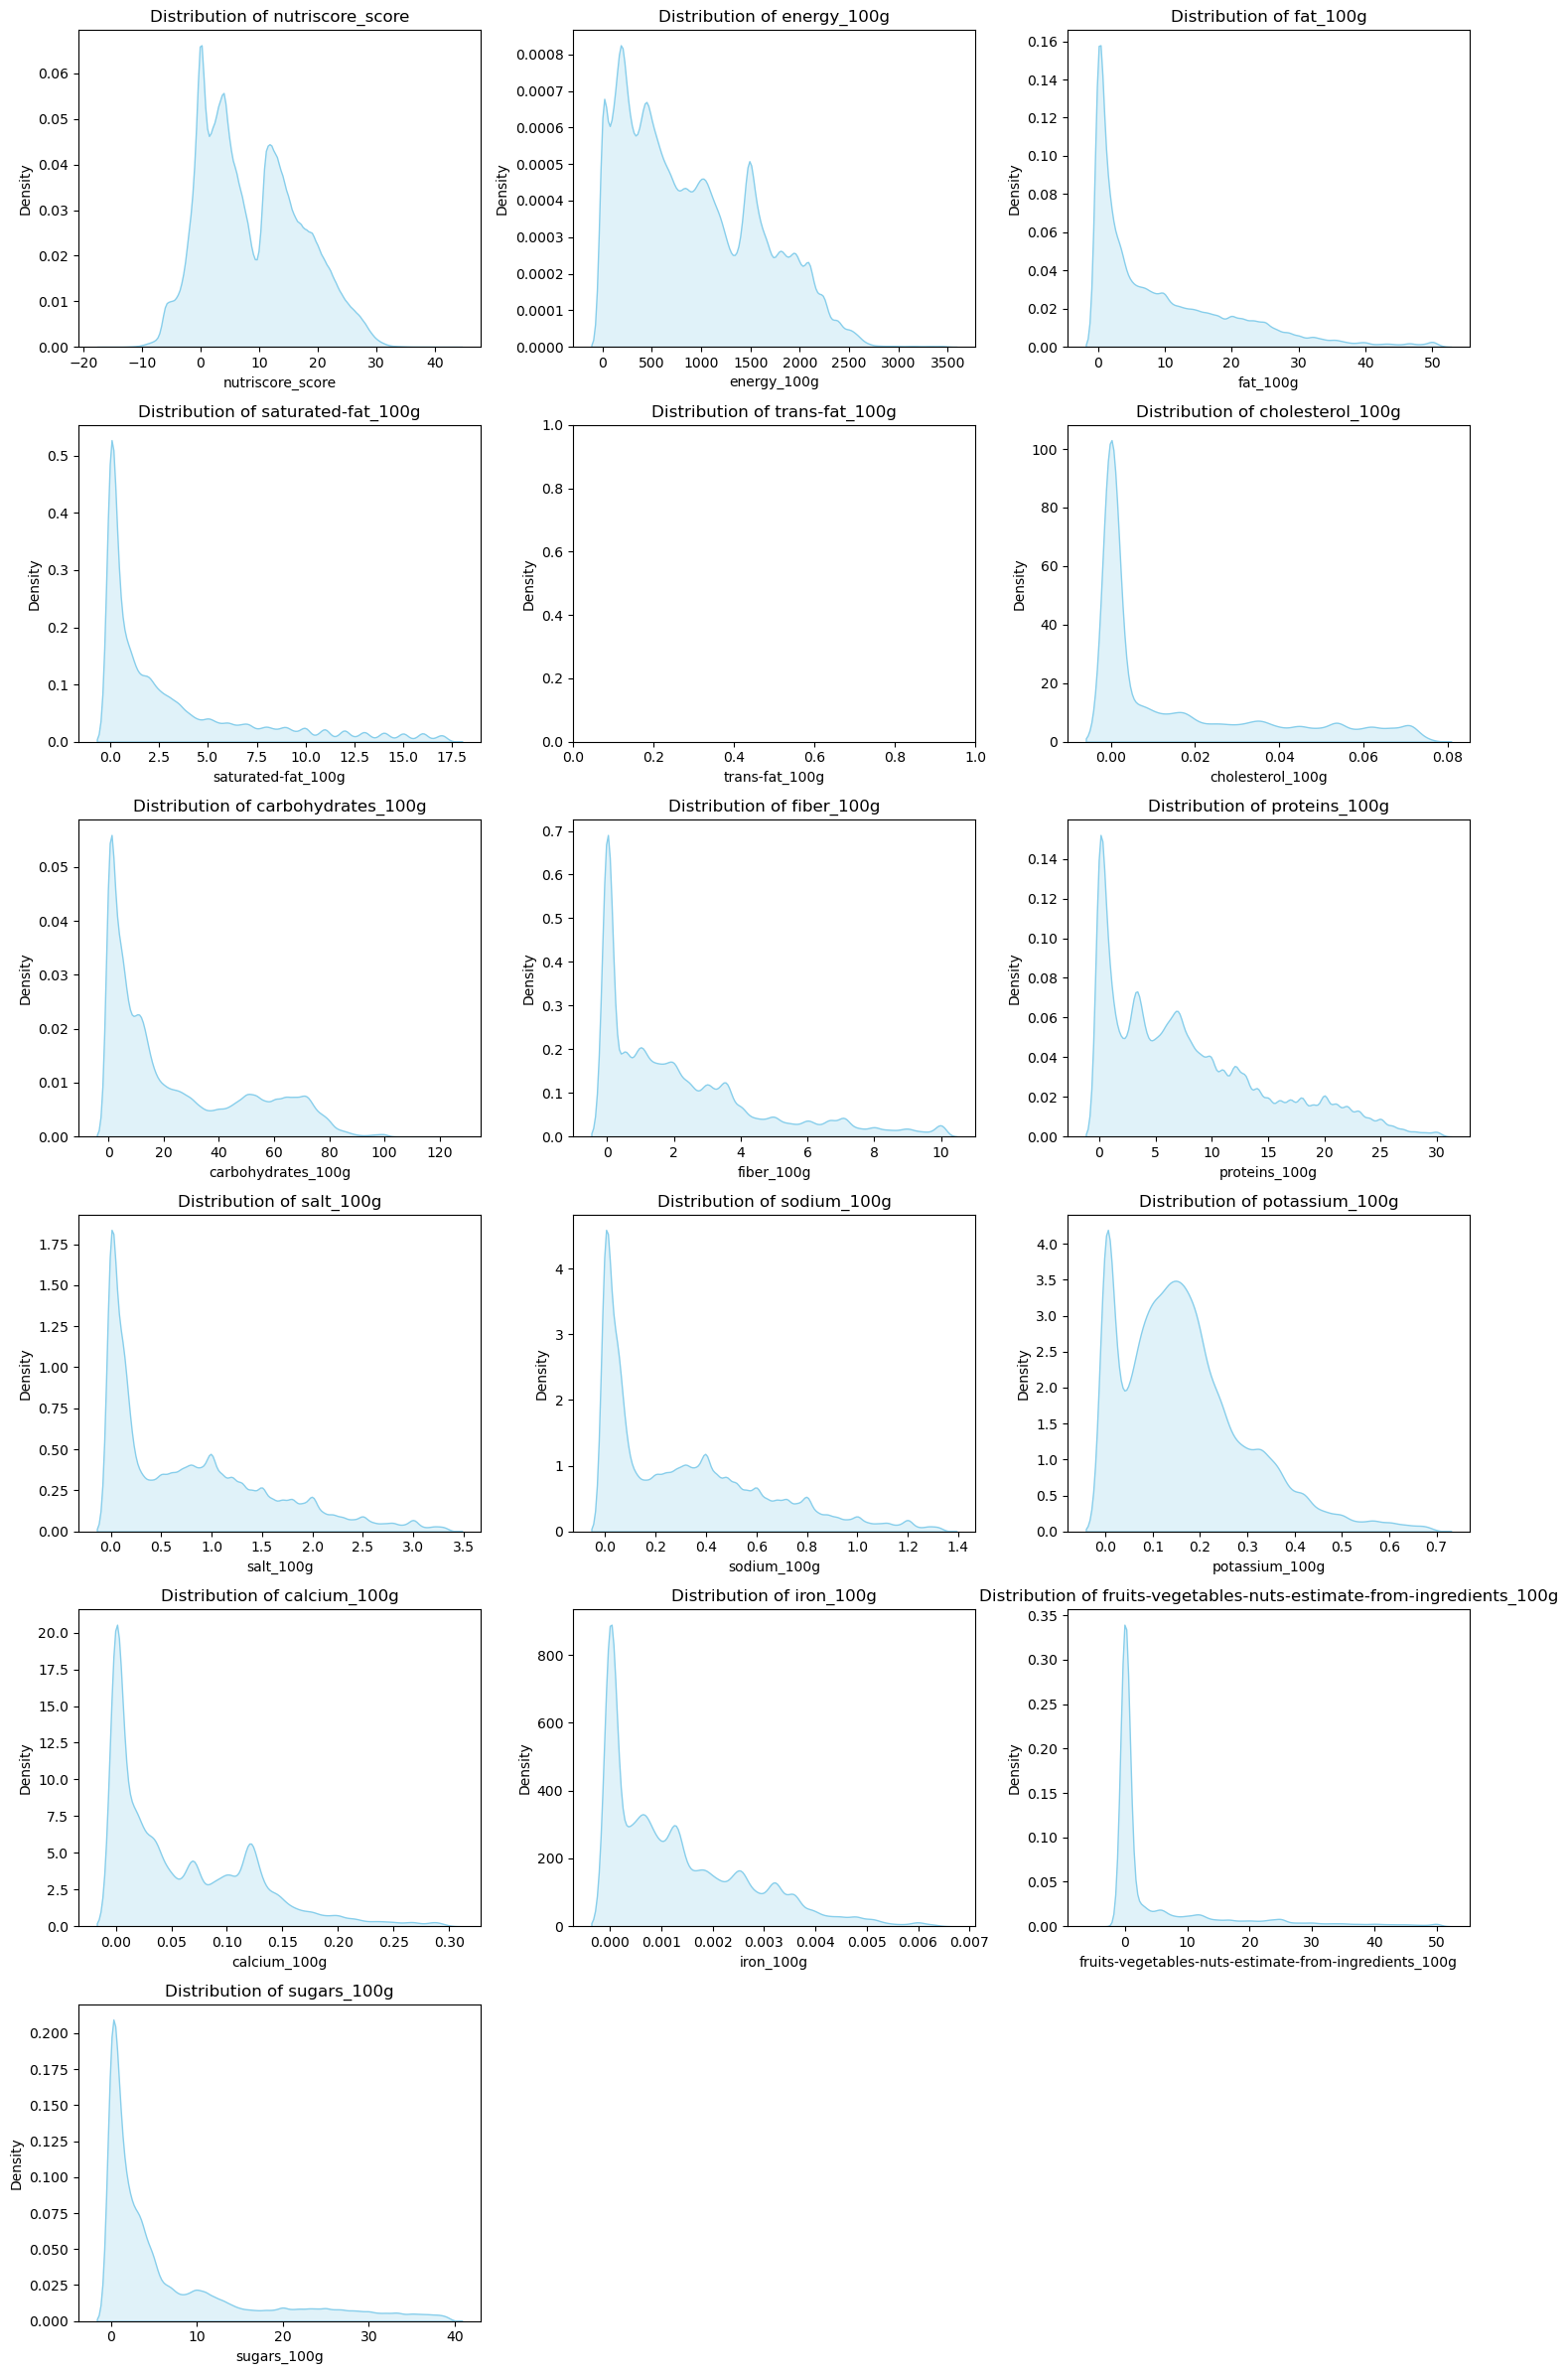

In [12]:
# Set up subplots
num_features = len(features_clean)
cols = 3  # Number of columns in the subplot grid
rows = (num_features // cols) + (num_features % cols > 0)  # Compute number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature's probability distribution
for i, feature in enumerate(features_clean):
    sns.kdeplot(df_cleaned[feature], fill=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation matrix after data pre-processing

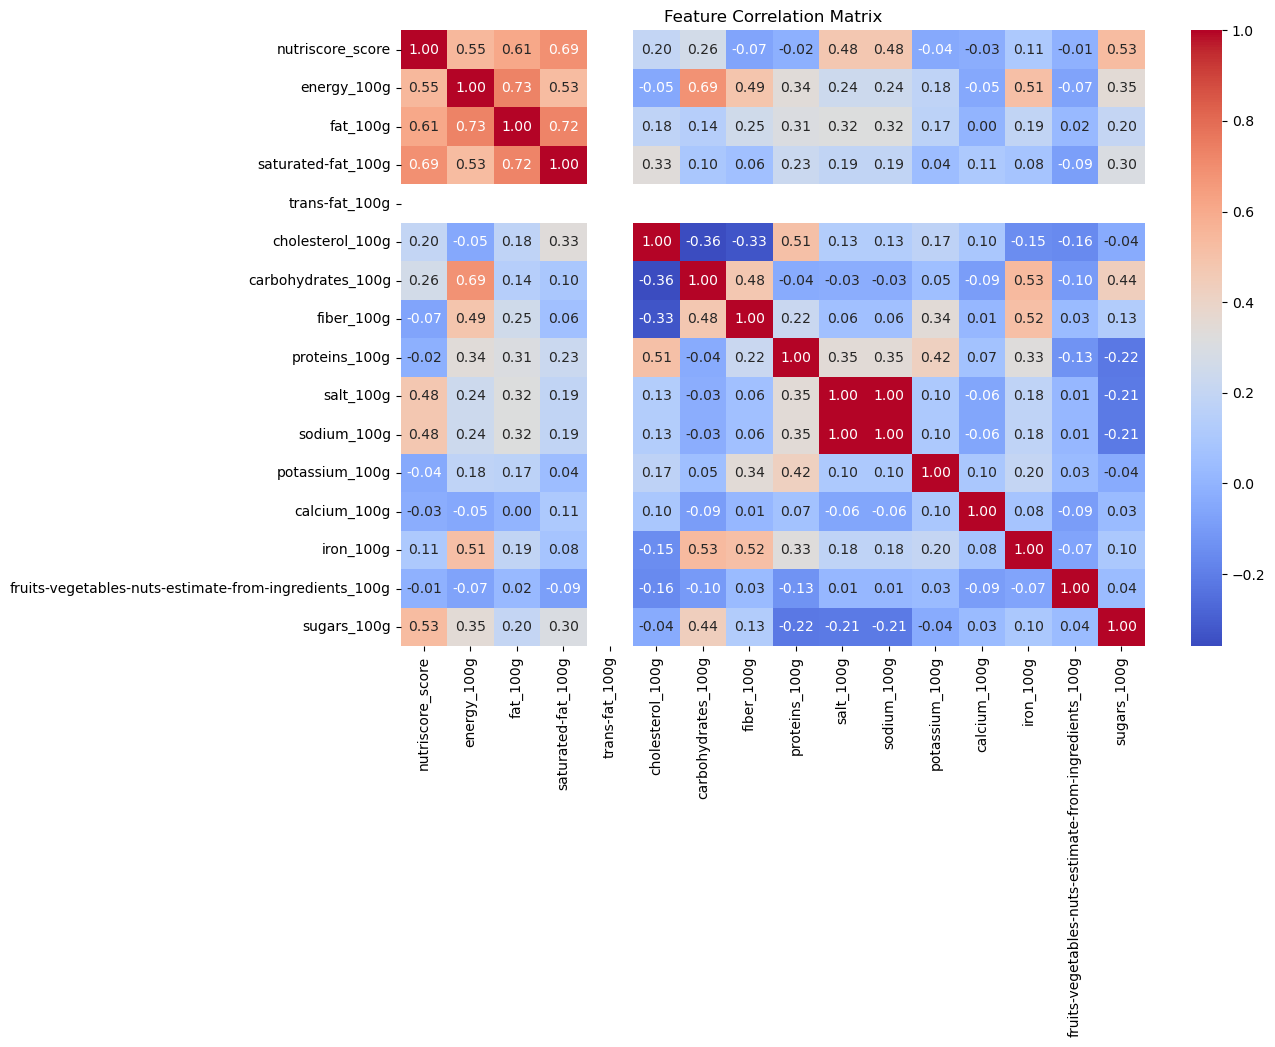

In [13]:
# Compute the correlation matrix
correlation_matrix = df_cleaned[features_clean].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

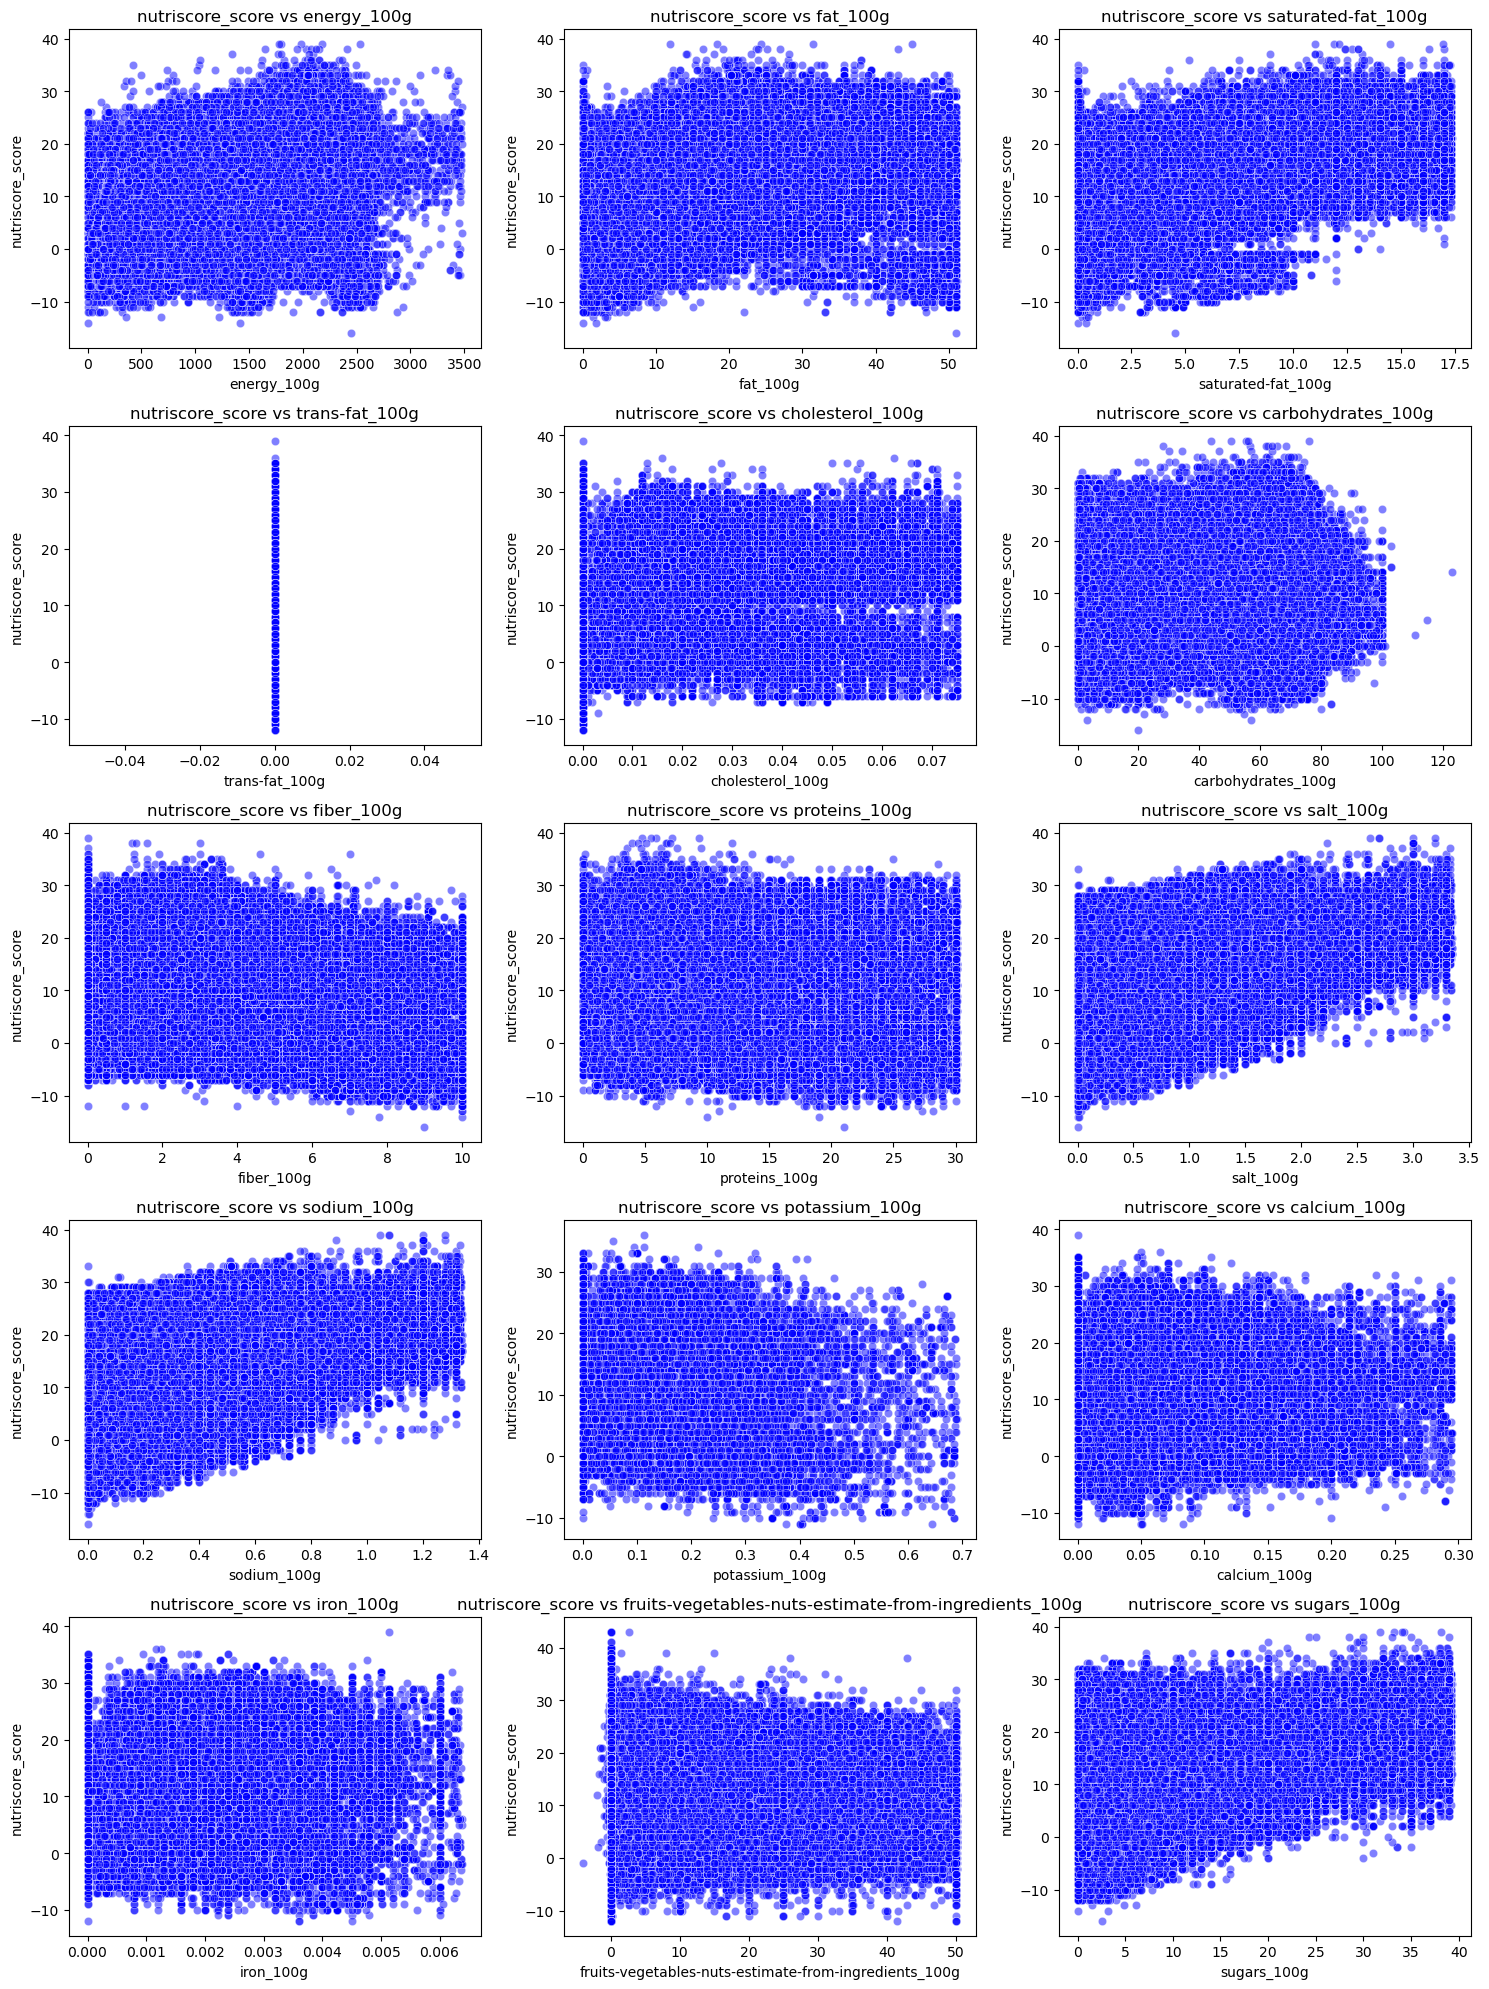

In [14]:
# Define the features to compare against energy_100g
features = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 
            'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
            'sodium_100g', 'potassium_100g', 'calcium_100g', 'iron_100g', 
            'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sugars_100g']

# Set up subplots
num_features = len(features)
cols = 3  # Number of columns in the subplot grid
rows = (num_features // cols) + (num_features % cols > 0)  # Compute number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot scatter plots for each feature vs. energy_100g
for i, feature in enumerate(features):
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['nutriscore_score'], ax=axes[i], color="blue", alpha=0.5)
    axes[i].set_title(f"nutriscore_score vs {feature}")
    axes[i].set_xlabel(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
df_cleaned.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,54,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1582569031,2020-02-24T18:30:31Z,1733085204,2024-12-01T20:33:24Z,NaN,1.738849e+09,2025-02-06T13:42:06Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1732913331,2024-11-29T20:48:51Z,insectproductadd,1.738849e+09,2025-02-06T13:41:15Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572117743,2019-10-26T19:22:23Z,1738073570,2025-01-28T14:12:50Z,NaN,1.738851e+09,2025-02-06T14:04:43Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1722606455,2024-08-02T13:47:35Z,1738180293,2025-01-29T19:51:33Z,maldan,1.738830e+09,2025-02-06T08:26:04Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,http://world-en.openfoodfacts.org/product/0000...,prepperapp,1716818343,2024-05-27T13:59:03Z,1738004031,2025-01-27T18:53:51Z,NaN,1.738828e+09,2025-02-06T07:47:55Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_model = df_cleaned[~df_cleaned['nutriscore_grade'].isin(['unknown', '25', '1531'])]

In [9]:
df_model.shape[0]

818927

# Probability distribution of nutriscore_score

In [ ]:
# Assuming df_filled contains the NutriScore grades
nutriscore_counts = df_model['nutriscore_grade'].value_counts(normalize=True) * 100

# Display the percentage of each NutriScore grade
print(nutriscore_counts)

d                 24.629068
c                 24.601801
e                 16.626019
a                 13.050310
b                 12.714350
not-applicable     8.378451
Name: nutriscore_grade, dtype: float64


: 

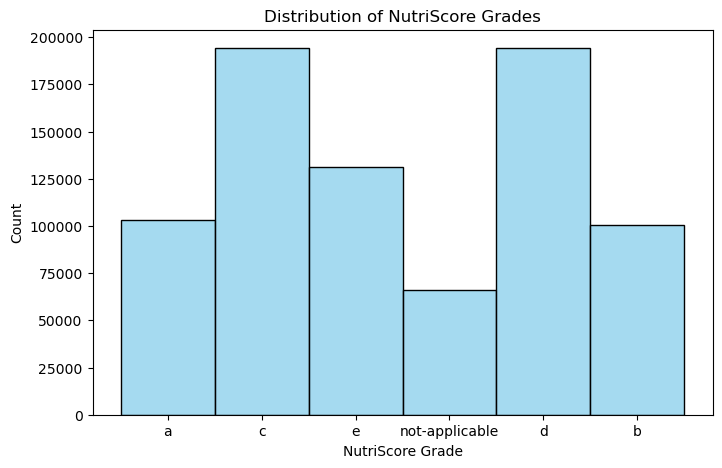

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_model['nutriscore_grade'], bins=5, discrete=True, kde=False, color='skyblue')

plt.xlabel('NutriScore Grade')
plt.ylabel('Count')
plt.title('Distribution of NutriScore Grades')
plt.show()